https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#17howtofindtheoptimalnumberoftopicsforlda

In [1]:
# - added stopwords =  covid, coronavirus, team, help

In [2]:
import pandas as pd

import nltk

# Run in terminal or command prompt
import spacy
#!python -m spacy download en

In [3]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [4]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [5]:
## read data
df_msgs_replies = pd.read_csv('ecv_analytics_scanning/ecv_analytics_scanning_data.csv')

In [6]:
# Convert to list
data = df_msgs_replies.text.values.tolist()

In [7]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['worldwide', 'testing', 'data', 'here', 'https', 'ourworldindata', 'org', 'grapher', 'full', 'list', 'cumulative', 'total', 'tests', 'per', 'thousand']]


In [8]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['worldwide', 'testing', 'data', 'here', 'https', 'ourworldindata', 'org', 'grapher', 'full', 'list', 'cumulative', 'total', 'tests', 'per', 'thousand']


In [9]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    stop_words.extend(['https','com','org','www','covid','coronavirus','help'])
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        print('Tags: ', [(token.lemma_,token.pos_) for token in doc])
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [10]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN','PROPN','ADJ','VERB','ADV'])

print(data_lemmatized[:1])

Tags:  [('worldwide', 'ADV'), ('test', 'VERB'), ('datum', 'NOUN'), ('ourworldindata', 'ADJ'), ('grapher', 'NOUN'), ('full', 'ADJ'), ('list', 'NOUN'), ('cumulative', 'ADJ'), ('total', 'NOUN'), ('test', 'NOUN'), ('per', 'ADP'), ('thousand', 'NUM')]
Tags:  [('look', 'VERB'), ('like', 'SCONJ'), ('gym', 'NOUN'), ('get', 'VERB'), ('ready', 'ADJ'), ('open', 'ADJ'), ('-PRON-', 'PRON'), ('sorry', 'ADJ'), ('annoying', 'ADJ'), ('fomat', 'NOUN')]
Tags:  [('source', 'NOUN'), ('tracking', 'NOUN'), ('violence', 'NOUN'), ('-PRON-', 'PRON')]
Tags:  [('event', 'NOUN'), ('today', 'NOUN')]
Tags:  [('add', 'VERB'), ('integration', 'NOUN'), ('channel', 'PROPN'), ('necsi', 'PROPN'), ('slack', 'PROPN'), ('services', 'PROPN'), ('wrrnn', 'PROPN'), ('google', 'PROPN'), ('calendar', 'PROPN'), ('team', 'NOUN'), ('event', 'NOUN')]
Tags:  [('add', 'VERB'), ('integration', 'NOUN'), ('channel', 'PROPN'), ('necsi', 'PROPN'), ('slack', 'PROPN'), ('services', 'PROPN'), ('bq', 'PROPN'), ('hr', 'PROPN'), ('google', 'PROPN'

Tags:  [('add', 'VERB'), ('resource', 'NOUN'), ('semanticscholar', 'PROPN'), ('cord', 'PROPN'), ('blog', 'PROPN'), ('datawrapper', 'PROPN'), ('de', 'PROPN'), ('docs_google', 'PROPN'), ('document', 'NOUN'), ('dtkjmhwq', 'VERB'), ('ncxhmjelp', 'PROPN'), ('ybt', 'PROPN'), ('hz', 'PROPN'), ('dje', 'ADJ'), ('preview', 'NOUN')]
Tags:  [('channel', 'PROPN'), ('exclamation', 'PROPN'), ('daily', 'PROPN'), ('scanning', 'NOUN'), ('update', 'NOUN'), ('exclamation', 'NOUN'), ('big', 'ADJ'), ('influx', 'ADJ'), ('scanning', 'NOUN'), ('project', 'NOUN'), ('gear', 'VERB'), ('towards', 'ADP'), ('provide', 'VERB'), ('patient', 'NOUN'), ('potential', 'ADJ'), ('patient', 'NOUN'), ('resource', 'NOUN'), ('better', 'ADV'), ('understand', 'VERB'), ('condition', 'NOUN'), ('option', 'NOUN'), ('give', 'VERB'), ('stage', 'NOUN'), ('un', 'PROPN'), ('infect', 'VERB'), ('infected', 'ADJ'), ('mild', 'ADJ'), ('symptom', 'NOUN'), ('severe', 'ADJ'), ('symptom', 'NOUN'), ('recover', 'VERB'), ('info', 'NOUN'), ('available'

Tags:  [('hi', 'INTJ'), ('everyone', 'PRON'), ('look', 'VERB'), ('spread', 'VERB'), ('information', 'NOUN'), ('ppe', 'PROPN'), ('test', 'NOUN'), ('kit', 'NOUN'), ('fraud', 'NOUN'), ('like', 'SCONJ'), ('price', 'NOUN'), ('gouge', 'VERB'), ('fake', 'ADJ'), ('product', 'NOUN'), ('want', 'VERB'), ('please', 'INTJ'), ('join', 'VERB'), ('sj', 'PROPN'), ('outreach', 'PROPN'), ('ppe', 'PROPN'), ('scam', 'NOUN'), ('site', 'NOUN'), ('http', 'PROPN'), ('ppescam', 'NOUN')]
Tags:  [('channel', 'PROPN'), ('weekly', 'ADJ'), ('scanning', 'NOUN'), ('time', 'NOUN'), ('social', 'PROPN'), ('hour', 'NOUN'), ('weekly', 'ADJ'), ('debrief', 'NOUN'), ('happen', 'VERB'), ('tomorrow', 'NOUN'), ('pst', 'NOUN'), ('sunday', 'PROPN'), ('pm_pst', 'PROPN'), ('zoom', 'PROPN'), ('detail', 'NOUN'), ('thread', 'VERB'), ('pin', 'NOUN'), ('post', 'PROPN'), ('channel', 'PROPN'), ('sunday', 'PROPN'), ('info', 'PROPN'), ('easily', 'ADV'), ('accessible', 'ADJ'), ('come', 'VERB'), ('cool', 'ADJ'), ('week', 'NOUN'), ('activity', 

Tags:  [('also', 'ADV'), ('channel', 'PROPN'), ('host', 'VERB'), ('another', 'DET'), ('scanning', 'NOUN'), ('team', 'NOUN'), ('zoom', 'NOUN'), ('weekly', 'ADJ'), ('debrief', 'NOUN'), ('hangout', 'NOUN'), ('hour', 'NOUN'), ('pm_pst', 'NOUN'), ('detail', 'NOUN'), ('post', 'VERB'), ('yesterday', 'NOUN'), ('please', 'INTJ'), ('attend', 'VERB'), ('great', 'ADJ'), ('time', 'NOUN'), ('space', 'NOUN'), ('talk', 'VERB'), ('project', 'NOUN'), ('improve', 'VERB'), ('team', 'NOUN'), ('function', 'NOUN'), ('good', 'ADJ'), ('old', 'PROPN'), ('camaraderie', 'NOUN')]
Tags:  [('channel', 'PROPN'), ('daily', 'ADJ'), ('scanning', 'NOUN'), ('project', 'NOUN'), ('update', 'VERB'), ('project_requeste', 'VERB'), ('project', 'NOUN'), ('need_lead', 'NOUN'), ('team', 'NOUN'), ('get', 'VERB'), ('ground', 'NOUN'), ('description', 'NOUN'), ('us', 'PROPN'), ('testing_sites', 'PROPN'), ('contact', 'NOUN'), ('detail', 'NOUN'), ('due_date', 'PROPN'), ('us', 'PROPN'), ('testing_locations', 'PROPN'), ('state', 'VERB'), 

Tags:  [('channel', 'PROPN'), ('scanning', 'PROPN'), ('team', 'NOUN'), ('welcome', 'VERB'), ('guide', 'PROPN'), ('document', 'NOUN'), ('live', 'ADJ'), ('team', 'NOUN'), ('member', 'NOUN'), ('feel_free', 'NOUN'), ('make', 'VERB'), ('comment', 'NOUN'), ('suggest', 'VERB'), ('edit', 'NOUN'), ('live', 'VERB'), ('document', 'NOUN'), ('change', 'NOUN'), ('change', 'NOUN'), ('thank', 'NOUN'), ('erktcak', 'NOUN'), ('work', 'NOUN'), ('team', 'NOUN'), ('member', 'NOUN'), ('especially', 'ADV'), ('sure', 'ADV'), ('read', 'VERB'), ('scanning', 'NOUN'), ('channel', 'NOUN'), ('description', 'NOUN'), ('scanning', 'NOUN'), ('commandment', 'NOUN'), ('docs_google', 'PROPN'), ('document', 'NOUN'), ('wrf', 'PROPN'), ('zyh', 'ADV'), ('ta', 'PROPN'), ('chhiefydq', 'PROPN'), ('wivkaejxu', 'NOUN'), ('jiz_xjwqfe', 'PROPN'), ('edit', 'NOUN'), ('scanning', 'NOUN'), ('team', 'NOUN'), ('welcome', 'VERB'), ('guide', 'NOUN')]
Tags:  [('receive', 'VERB'), ('summons_mighty', 'NUM'), ('one', 'NUM'), ('request_scanner', 

Tags:  [('want', 'VERB'), ('highlight', 'NOUN'), ('piece', 'NOUN'), ('text', 'NOUN'), ('german', 'ADJ'), ('top', 'ADJ'), ('expert', 'NOUN'), ('group', 'NOUN'), ('report', 'NOUN'), ('make', 'VERB'), ('fight', 'VERB'), ('pandemic', 'ADJ'), ('sustainable', 'ADJ'), ('mask', 'NOUN'), ('supply', 'VERB'), ('mask', 'NOUN'), ('health', 'NOUN'), ('care', 'NOUN'), ('system', 'NOUN'), ('nurse', 'VERB'), ('old', 'ADJ'), ('people', 'NOUN'), ('home', 'NOUN'), ('secure', 'VERB'), ('wear', 'VERB'), ('mask', 'NOUN'), ('extend', 'VERB'), ('entire', 'ADJ'), ('population', 'NOUN'), ('tran', 'NOUN'), ('sitional', 'ADJ'), ('period', 'NOUN'), ('sufficient', 'ADJ'), ('mask', 'NOUN'), ('professional', 'ADJ'), ('production', 'NOUN'), ('available', 'ADJ'), ('popula', 'PROPN'), ('tion', 'NOUN'), ('provide', 'VERB'), ('information', 'NOUN'), ('independent', 'ADJ'), ('production', 'NOUN'), ('effective', 'ADJ'), ('mask', 'NOUN'), ('least', 'ADJ'), ('person', 'NOUN'), ('come', 'VERB'), ('contact', 'NOUN'), ('person', 

Tags:  [('channel', 'PROPN'), ('start', 'VERB'), ('google', 'PROPN'), ('sheet', 'PROPN'), ('european', 'PROPN'), ('quarantine', 'PROPN'), ('shutdown', 'PROPN'), ('protocol', 'NOUN')]
Tags:  [('ns', 'PROPN'), ('joined', 'PROPN'), ('channel', 'PROPN')]
Tags:  [('tkeh', 'PROPN'), ('py', 'PROPN'), ('join', 'VERB'), ('channel', 'PROPN')]
Tags:  [('st_tu', 'PROPN'), ('join', 'VERB'), ('channel', 'PROPN')]
Tags:  [('joined', 'PROPN'), ('channel', 'PROPN')]
Tags:  [('st_tu', 'PROPN'), ('tkeh', 'PROPN'), ('py', 'PROPN'), ('lmds', 'PROPN'), ('interested', 'ADJ'), ('help', 'VERB'), ('scanning', 'NOUN'), ('brane', 'NOUN'), ('add', 'VERB'), ('purpose', 'NOUN')]
Tags:  [('uj', 'PROPN'), ('joined', 'PROPN'), ('channel', 'PROPN')]
Tags:  [('welcome', 'ADJ'), ('newcomer', 'NOUN'), ('zoom', 'PROPN'), ('call', 'VERB'), ('necsi', 'PROPN'), ('stuff', 'NOUN'), ('put', 'VERB'), ('google', 'PROPN'), ('sheet', 'NOUN'), ('develop', 'VERB'), ('populate', 'NOUN'), ('collaboratively', 'ADV'), ('afterward', 'ADV'),

Tags:  [('create', 'VERB'), ('channel', 'PROPN'), ('bh_pd', 'PROPN'), ('scanning', 'PROPN'), ('open', 'ADJ'), ('source', 'VERB'), ('crowd', 'NOUN'), ('source', 'VERB'), ('resource', 'NOUN'), ('hackathon', 'NOUN'), ('list', 'NOUN'), ('open', 'ADJ'), ('source', 'NOUN'), ('material', 'NOUN'), ('crowdsource', 'VERB'), ('resource', 'NOUN')]
Tags:  [('uuruk_nhj', 'PROPN'), ('join', 'VERB'), ('channel', 'PROPN')]
Tags:  [('gmxss', 'PROPN'), ('join', 'VERB'), ('channel', 'PROPN')]
Tags:  [('hdv', 'PROPN'), ('set', 'PROPN'), ('channel', 'PROPN'), ('purpose', 'NOUN'), ('container', 'NOUN'), ('uuruk_nhj', 'NOUN')]
Tags:  [('hdv', 'PROPN'), ('join', 'VERB'), ('channel', 'PROPN')]
Tags:  [('update', 'NOUN'), ('time', 'PROPN'), ('shift', 'VERB'), ('edt', 'PROPN')]
Tags:  [('hi', 'INTJ'), ('paige', 'X'), ('yes', 'INTJ'), ('weekly', 'PROPN'), ('hangout', 'VERB'), ('general', 'ADJ'), ('meeting', 'NOUN'), ('offer', 'VERB'), ('two', 'NUM'), ('separate', 'ADJ'), ('day', 'NOUN'), ('different', 'ADJ'), ('ti

Tags:  [('yahoo', 'PROPN'), ('news', 'PROPN'), ('evidence', 'NOUN'), ('suggest', 'VERB'), ('likely', 'ADV'), ('spread', 'VERB'), ('html', 'PROPN'), ('yahoo', 'PROPN'), ('news', 'PROPN'), ('evidence', 'NOUN'), ('suggest', 'VERB'), ('likely', 'ADV'), ('spread', 'VERB'), ('html', 'NOUN')]
Tags:  [('medium', 'PROPN'), ('ngranati', 'PROPN'), ('relevance', 'PROPN'), ('need', 'VERB'), ('get', 'VERB'), ('knowledgeable', 'ADJ'), ('degrowth', 'NOUN'), ('movement', 'NOUN'), ('example', 'NOUN')]
Tags:  [('cronycle', 'NOUN')]
Tags:  [('twitt', 'ADJ'), ('ngranati', 'ADV')]
Tags:  [('sorry', 'INTJ'), ('make', 'VERB'), ('recording', 'NOUN'), ('let', 'NOUN'), ('know', 'VERB'), ('week', 'NOUN')]
Tags:  [('thank', 'VERB'), ('put', 'PROPN'), ('notification', 'NOUN'), ('miss', 'PROPN')]
Tags:  [('listen', 'VERB'), ('podcast', 'NOUN'), ('seem', 'VERB'), ('interesting', 'ADJ'), ('get', 'VERB'), ('opinion', 'NOUN'), ('someone', 'PRON'), ('inside', 'ADP'), ('youtube', 'PROPN'), ('watch', 'PROPN'), ('cago', 'PR

Tags:  [('rt', 'PROPN'), ('pcr', 'PROPN'), ('currently', 'ADV'), ('gold', 'NOUN'), ('standard', 'NOUN'), ('also', 'ADV'), ('chokepoint', 'VERB'), ('many', 'ADJ'), ('location', 'NOUN'), ('swabs', 'PROPN'), ('medium', 'NOUN'), ('amp', 'NOUN'), ('reagant', 'NOUN'), ('also', 'ADV'), ('focal', 'ADJ'), ('supply', 'NOUN'), ('amp', 'NOUN'), ('distribution', 'NOUN'), ('issue', 'NOUN'), ('lavage', 'VERB'), ('much', 'ADJ'), ('afik', 'NOUN'), ('believe', 'VERB'), ('cov', 'PROPN'), ('may', 'VERB'), ('initially', 'ADV'), ('lodge', 'VERB'), ('upper', 'ADJ'), ('resp', 'PROPN'), ('st', 'PROPN'), ('seed', 'PROPN'), ('bronchial', 'ADJ'), ('tree', 'NOUN'), ('parallel', 'VERB'), ('transit', 'NOUN'), ('via', 'ADP'), ('blood', 'NOUN'), ('circulation', 'NOUN'), ('ddpcr', 'PROPN'), ('batch', 'VERB'), ('testing', 'PROPN'), ('cat', 'PROPN'), ('scan', 'PROPN'), ('diagnosis', 'PROPN'), ('amp', 'PROPN'), ('come', 'VERB'), ('ct', 'PROPN'), ('accept', 'VERB'), ('establish', 'VERB'), ('near', 'SCONJ'), ('overseas', 'P

Tags:  [('thanks', 'INTJ'), ('yrl', 'PROPN'), ('case', 'NOUN'), ('number', 'NOUN'), ('less', 'ADJ'), ('issue', 'NOUN'), ('since', 'SCONJ'), ('plenty', 'ADJ'), ('good', 'ADJ'), ('dataset', 'NOUN'), ('like', 'SCONJ'), ('one', 'NOUN'), ('share', 'VERB'), ('internet_usage', 'NOUN'), ('tricky', 'ADJ')]
Tags:  [('example', 'NOUN'), ('percentage', 'NOUN'), ('people', 'NOUN'), ('internet', 'VERB'), ('datum', 'NOUN'), ('worldbank', 'PROPN'), ('indicator', 'NOUN'), ('net', 'ADJ'), ('user', 'NOUN'), ('zs', 'PUNCT'), ('maybe', 'ADV'), ('dataset', 'VERB'), ('track_internet', 'NOUN'), ('traffic', 'NOUN'), ('time', 'NOUN')]
Tags:  [('serendipity', 'NOUN'), ('look', 'VERB'), ('worldbank', 'PROPN'), ('data', 'PROPN')]
Tags:  [('perhaps', 'ADV'), ('one', 'NUM'), ('internet_usage', 'NOUN'), ('sure', 'ADV'), ('often', 'ADV'), ('update', 'VERB'), ('stat', 'NOUN'), ('htm', 'VERB'), ('stat', 'NOUN'), ('htm', 'PROPN')]
Tags:  [('libraryguides', 'ADP'), ('mcgill', 'PROPN'), ('ca', 'VERB'), ('php', 'VERB'), ('a

Tags:  [('effect', 'NOUN'), ('non', 'ADJ'), ('pharmaceutical', 'ADJ'), ('intervention', 'NOUN'), ('contain', 'VERB'), ('outbreak', 'PROPN'), ('china', 'PROPN'), ('shengjie', 'PROPN'), ('lai', 'PROPN'), ('nick', 'PROPN'), ('ruktanonchai', 'PROPN'), ('liangcai', 'PROPN'), ('zhou', 'PROPN'), ('olivia', 'PROPN'), ('prosper', 'PROPN'), ('wei', 'PROPN'), ('luo', 'PROPN'), ('jessica', 'PROPN'), ('floyd', 'PROPN'), ('amy', 'PROPN'), ('wesolowski', 'PROPN'), ('mauricio', 'PROPN'), ('santillana', 'PROPN'), ('chi', 'PROPN'), ('zhang', 'PROPN'), ('xiangjun', 'PROPN'), ('du', 'PROPN'), ('hongjie', 'PROPN'), ('yu', 'PROPN'), ('andrew', 'PROPN'), ('tatem', 'PROPN'), ('containment', 'NOUN'), ('strategy', 'NOUN'), ('integrate', 'VERB'), ('intervention', 'NOUN'), ('npis', 'ADV'), ('include', 'VERB'), ('travel_bans', 'PROPN'), ('restriction', 'NOUN'), ('contact', 'NOUN'), ('reduction', 'NOUN'), ('social_distancing', 'NUM'), ('early', 'ADJ'), ('case', 'NOUN'), ('identification', 'NOUN'), ('isolation', 'NO

Tags:  [('hope', 'PROPN'), ('make', 'VERB'), ('tomorrow', 'NOUN')]
Tags:  [('brilliant', 'ADJ')]
Tags:  [('super', 'ADV'), ('helpful', 'ADJ'), ('information', 'NOUN'), ('thank', 'NOUN'), ('much', 'ADJ')]
Tags:  [('help', 'VERB'), ('list', 'VERB'), ('related', 'ADJ'), ('executive', 'ADJ'), ('order', 'NOUN'), ('state', 'NOUN'), ('web', 'NOUN'), ('csg', 'NOUN'), ('executive', 'NOUN'), ('order', 'NOUN')]
Tags:  [('also', 'ADV'), ('research', 'PROPN'), ('datum', 'NOUN'), ('state', 'NOUN'), ('make', 'VERB'), ('modification', 'NOUN'), ('clia', 'PROPN'), ('guideline', 'NOUN'), ('something', 'PRON'), ('interested', 'ADJ'), ('look', 'VERB'), ('response', 'NOUN'), ('sci', 'PROPN'), ('volunteer', 'PROPN'), ('database', 'PROPN'), ('channel', 'PROPN'), ('dm', 'PROPN'), ('want', 'VERB'), ('information', 'NOUN')]
Tags:  [('yk', 'ADJ'), ('thank', 'NOUN'), ('see', 'VERB'), ('eo', 'PROPN'), ('list', 'NOUN'), ('see', 'VERB'), ('information', 'NOUN'), ('compile', 'VERB'), ('state', 'NOUN'), ('change', 'VER

Tags:  [('sorry', 'ADJ'), ('summon', 'PROPN'), ('scanner', 'NOUN')]
Tags:  [('receive', 'VERB'), ('summons_mighty', 'NUM'), ('one', 'NUM'), ('request_scanner', 'NUM'), ('google', 'NOUN'), ('form', 'NOUN'), ('forms_gle', 'NOUN'), ('fcs_rpepsr', 'PROPN'), ('fjs', 'NOUN'), ('additional_support', 'PROPN'), ('contact_andrew', 'NOUN'), ('scanning', 'NOUN'), ('lead', 'NOUN'), ('bother', 'NOUN'), ('contact', 'NOUN'), ('rychuthelegend', 'NOUN')]
Tags:  [('run', 'VERB'), ('bit', 'NOUN'), ('behind', 'ADV'), ('soon', 'ADV')]
Tags:  [('ping', 'VERB'), ('uuz_sedpa', 'PROPN'), ('ed', 'NOUN'), ('uuyulak', 'PROPN')]
Tags:  [('great', 'ADJ'), ('thank', 'NOUN')]
Tags:  [('andrew', 'PROPN'), ('yes', 'PROPN'), ('christian', 'PROPN'), ('speak', 'VERB'), ('challenge', 'NOUN'), ('amp', 'PROPN'), ('importance', 'NOUN'), ('augmentee', 'VERB'), ('volunteer', 'NOUN'), ('contact', 'NOUN'), ('tracing', 'NOUN'), ('need', 'VERB'), ('get', 'AUX'), ('automate', 'VERB'), ('method', 'NOUN'), ('widespread', 'ADJ'), ('quic

Tags:  [('preliminary', 'ADJ'), ('scanning', 'NOUN'), ('result', 'VERB'), ('slack', 'VERB'), ('alternative', 'NOUN'), ('alternative', 'NOUN'), ('list', 'NOUN'), ('_', 'ADV'), ('good', 'ADJ'), ('slack', 'NOUN'), ('alternative', 'NOUN'), ('jotform', 'PROPN'), ('blog', 'PROPN'), ('jotform', 'PROPN'), ('blog', 'PROPN'), ('good', 'ADJ'), ('slack', 'PROPN'), ('alternative', 'NOUN'), ('slack', 'VERB'), ('big', 'ADJ'), ('boss', 'NOUN'), ('world', 'NOUN'), ('team', 'NOUN'), ('messenger', 'NOUN'), ('become', 'VERB'), ('even', 'ADV'), ('big', 'ADJ'), ('acquire', 'VERB'), ('stride', 'NOUN'), ('hipchat', 'NOUN'), ('well', 'ADV'), ('know', 'VERB'), ('silicon', 'PROPN'), ('valley', 'PROPN'), ('unicorn', 'PROPN'), ('slack', 'PROPN'), ('melt', 'VERB'), ('pot', 'NOUN'), ('top', 'ADJ'), ('notch', 'NOUN'), ('functionality', 'NOUN'), ('versatility', 'NOUN'), ('however', 'ADV'), ('innovation', 'NOUN'), ('constantly', 'ADV'), ('breed', 'VERB'), ('innovation', 'NOUN'), ('good', 'ADJ'), ('slack', 'PROPN'), ('a

Tags:  [('twitt', 'ADJ'), ('ballouxfrancois', 'PROPN'), ('status', 'PROPN')]
Tags:  [('twitter', 'PROPN'), ('davidrliu', 'PROPN'), ('status', 'PROPN')]
Tags:  [('time', 'NOUN'), ('immunity', 'NOUN'), ('reinfection', 'NOUN')]
Tags:  [('look', 'VERB'), ('like', 'SCONJ'), ('common', 'ADJ'), ('theme', 'NOUN'), ('infect', 'VERB'), ('never', 'ADV'), ('fully', 'ADV'), ('recover', 'VERB'), ('need', 'NOUN'), ('focus', 'NOUN'), ('method', 'NOUN'), ('confirm', 'VERB'), ('true', 'ADJ'), ('recovery', 'NOUN'), ('dckc', 'PROPN'), ('cl', 'PROPN'), ('kga', 'PROPN'), ('uurc_dw', 'PROPN'), ('fyi', 'PROPN')]
Tags:  [('yes', 'INTJ'), ('agree', 'VERB')]
Tags:  [('think', 'VERB'), ('actual', 'ADJ'), ('proof', 'ADJ'), ('reinfection', 'NOUN'), ('like', 'SCONJ'), ('emergence', 'NOUN'), ('infection', 'NOUN')]
Tags:  [('immune', 'ADJ'), ('system', 'NOUN'), ('treatment', 'NOUN'), ('put', 'VERB'), ('virus', 'NOUN'), ('gt', 'CCONJ'), ('immune', 'ADJ'), ('reaction', 'NOUN'), ('go', 'VERB'), ('gt', 'NOUN'), ('virus', 

Tags:  [('feedback', 'VERB'), ('everything', 'PRON'), ('need', 'VERB'), ('somewhat', 'ADV'), ('related', 'ADJ'), ('question', 'NOUN'), ('image', 'NOUN'), ('within', 'ADP'), ('web', 'NOUN'), ('resource', 'NOUN'), ('get', 'VERB'), ('crawl', 'VERB'), ('metadata', 'PROPN'), ('associate', 'VERB'), ('image', 'NOUN'), ('alt', 'PROPN'), ('title', 'NOUN'), ('attribute', 'NOUN'), ('may', 'VERB'), ('good', 'ADJ'), ('indexing', 'NOUN'), ('cross', 'PROPN'), ('referencing', 'PROPN'), ('tagging', 'NOUN')]
Tags:  [('get', 'AUX'), ('crawled', 'ADJ'), ('yet', 'ADV'), ('envision', 'NOUN'), ('do', 'VERB'), ('ultra', 'ADV'), ('streamlined', 'ADJ'), ('brane', 'ADJ'), ('graph', 'NOUN'), ('storage', 'NOUN'), ('cost', 'NOUN'), ('question', 'NOUN'), ('mark', 'NOUN'), ('-PRON-', 'PRON'), ('comment', 'VERB'), ('image', 'NOUN'), ('add', 'VERB'), ('component', 'NOUN'), ('graph', 'NOUN')]
Tags:  [('thank', 'NOUN'), ('lmds', 'PROPN')]
Tags:  [('hdv', 'PROPN'), ('add', 'VERB'), ('geo', 'PROPN'), ('scope', 'NOUN'), ('o

Tags:  [('want', 'VERB'), ('make', 'VERB'), ('introduction', 'NOUN'), ('ac', 'ADP'), ('amp', 'PROPN'), ('lmds', 'PROPN'), ('give', 'VERB'), ('skill', 'NOUN'), ('set', 'NOUN')]
Tags:  [('mail', 'PROPN'), ('mailto', 'PROPN'), ('spachev', 'VERB'), ('gmail', 'PROPN'), ('spachev', 'VERB'), ('gmail', 'ADV'), ('case', 'NOUN'), ('miss', 'PROPN'), ('slack', 'PROPN'), ('message', 'NOUN')]
Tags:  [('hi', 'INTJ'), ('nice', 'PROPN'), ('meet', 'VERB'), ('wave', 'NOUN'), ('uuptpuhck', 'PROPN'), ('lead', 'NOUN'), ('team', 'NOUN'), ('best', 'ADV'), ('big', 'ADJ'), ('picture', 'NOUN'), ('view', 'NOUN'), ('go', 'VERB')]
Tags:  [('welcome', 'VERB'), ('aupr', 'PROPN'), ('great', 'PROPN'), ('see', 'VERB')]
Tags:  [('gmxss', 'PROPN'), ('thanks', 'PROPN'), ('info', 'PROPN'), ('send', 'VERB'), ('note', 'NOUN')]
Tags:  [('welcome', 'PROPN'), ('aupr', 'PROPN')]
Tags:  [('information', 'NOUN'), ('could', 'VERB'), ('easily', 'ADV'), ('compile', 'VERB'), ('table', 'NOUN'), ('could', 'VERB'), ('enlist', 'VERB'), ('s

In [11]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('cumulative', 1),
  ('datum', 1),
  ('full', 1),
  ('grapher', 1),
  ('list', 1),
  ('ourworldindata', 1),
  ('test', 2),
  ('total', 1),
  ('worldwide', 1)]]

In [12]:
# # Build LDA model
# lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics=20, 
#                                            random_state=42,
#                                            update_every=1,
#                                            chunksize=100,
#                                            passes=10,
#                                            alpha='auto',
#                                            per_word_topics=True)

In [13]:
# # Print the Keyword in the 10 topics
# pprint(lda_model.print_topics())
# doc_lda = lda_model[corpus]

In [14]:
# # Visualize the topics
# pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
# vis

In [15]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, random_state = 42)
       
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [16]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=20, step=1)

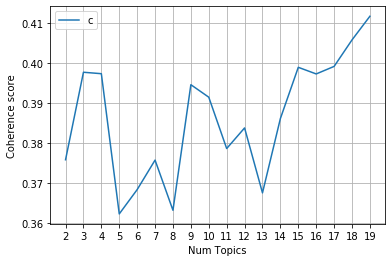

In [17]:
# Show graph
limit=20; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.xticks(ticks = x, labels=x)
plt.legend(("coherence_values"), loc='best')
plt.grid()
plt.show()

In [18]:
# Select the model and print the topics
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics())

[(0,
  '0.010*"team" + 0.008*"scanning" + 0.008*"channel" + 0.007*"project" + '
  '0.006*"would" + 0.005*"work" + 0.005*"people" + 0.005*"make" + 0.004*"get" '
  '+ 0.004*"content"'),
 (1,
  '0.012*"team" + 0.011*"scanning" + 0.009*"channel" + 0.009*"project" + '
  '0.006*"zoom" + 0.005*"join" + 0.005*"us" + 0.005*"post" + 0.005*"work" + '
  '0.005*"lead"'),
 (2,
  '0.007*"status" + 0.006*"scanning" + 0.006*"twitter" + 0.005*"team" + '
  '0.004*"may" + 0.004*"flag" + 0.004*"would" + 0.004*"need" + 0.004*"look" + '
  '0.004*"state"')]


In [19]:
# # Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word)
vis

/Users/akshatapatel/opt/anaconda3/envs/Python37/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.040966 -0.016256       1        1  41.085224
2     -0.038425 -0.019708       2        1  30.840223
0     -0.002541  0.035964       3        1  28.074547, topic_info=     Category       Freq     Term      Total  loglift  logprob
194   Default  63.000000   status  63.000000  30.0000  30.0000
371   Default  47.000000  twitter  47.000000  29.0000  29.0000
2499  Default  32.000000     flag  32.000000  28.0000  28.0000
115   Default  67.000000     zoom  67.000000  27.0000  27.0000
382   Default  46.000000     make  46.000000  26.0000  26.0000
...       ...        ...      ...        ...      ...      ...
559    Topic3  16.444775      new  48.125668   0.1965  -5.9063
444    Topic3  15.990107  request  46.548569   0.2018  -5.9343
196    Topic3  17.284937     find  69.739983  -0.1246  -5.8565
261    Topic3  17.514978     lead  74.841408  -0.1820  -5.8432
267    Topic3  16.405823      may  70.103432  -0.1820  -5.9087

[282 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
926       1  0.170795          abs
926       2  0.683179          abs
926       3  0.170795          abs
3006      1  0.928484  abstract_id
2370      1  0.864903   aeb_bphyrw
...     ...       ...          ...
2547      3  0.150642     карантин
2548      2  0.902720  карантинные
2572      1  0.100646     режим_чп
2572      2  0.805168     режим_чп
2572      3  0.100646     режим_чп

[494 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

In [22]:
def format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data, users = df_msgs_replies['user']):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents,users], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data, users= df_msgs_replies['user'])


In [67]:
# Group top sentence under each topic
sent_topics_sorteddf = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf = pd.concat([sent_topics_sorteddf, grp.sort_values(['Perc_Contribution'], ascending=[0]).head(20)], axis=0)

# Reset Index    
sent_topics_sorteddf.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text", "Users"]

# Show
sent_topics_sorteddf

,Topic_Num,Topic_Perc_Contrib,Keywords,Text,Users
0,0.0,0.9969,"team, scanning, channel, project, would, work,...",Another source of Internet Usage: Yandex Stati...,eduardo.garcia
1,0.0,0.9955,"team, scanning, channel, project, would, work,...",&gt; *From:* Ross Epstein \n&gt; *Subject: foo...,yaneer
2,0.0,0.9942,"team, scanning, channel, project, would, work,...",Assessing the Impact of Reduced Travel on Expo...,eduardo.garcia
3,0.0,0.9935,"team, scanning, channel, project, would, work,...",From the same article:\n[As the Mail and Sun a...,viljami.virolainen
4,0.0,0.9934,"team, scanning, channel, project, would, work,...",<@UUPTPUHCK> the closed border analysis is a V...,lapido
5,0.0,0.9925,"team, scanning, channel, project, would, work,...","1. No, it is not enough. Needs to be sure that...",viljami.virolainen
6,0.0,0.9923,"team, scanning, channel, project, would, work,...",Request from Chris Bakerlee/Josh Morrison for ...,danielszev
7,0.0,0.9917,"team, scanning, channel, project, would, work,...",A data-driven assessment of early travel restr...,eduardo.garcia
8,0.0,0.9874,"team, scanning, channel, project, would, work,...",Some feedback on our end:\n\n<@U01004LMDS6> Th...,nicolas
9,0.0,0.9867,"team, scanning, channel, project, would, work,...","That is a good idea <@U010ERKTCAK>, I can make...",zamorajandrew


In [68]:
#sent_topics_sorteddf.to_csv('ecv_analytics_scanning_topics_text_20_users.csv')

In [40]:
for i in sent_topics_sorteddf['Topic_Num'].unique():
    print('Topic: ',i)
    df_topic = sent_topics_sorteddf[sent_topics_sorteddf['Topic_Num']==i]['Text']
    for j in (df_topic.values):
        print(j)
        print('--------------------------------------------------------------')
    print('#####################################')

Topic:  0.0
Another source of Internet Usage: Yandex Statistics


Google Translate:

:ru:Russians have become less likely to search for information about coronavirus on the Internet.  This is evidenced by Yandex statistics.

 So, the peak for the search query “coronavirus” was recorded in mid-March - 57.7 million requests per week.  Then the indicator fell sharply - in the last week of March the average number of requests was 25 million, and in the second week of April it dropped to a record low of 228 thousand requests.

 For search queries with the phrase "coronavirus test" in mid-March, the figure was 265 thousand, and in mid-April - only about two thousand queries per week.

 The decrease in the popularity of these requests is also indicated by Google Trends.  The service does not give absolute values, but you can evaluate the popularity index.  For the word “coronavirus” at the end of March, it was 100 points, then it began to decline gradually and now it is only 37 points (100 po

#### For one-pager

In [35]:
cnt = 0
for i in df_msgs_replies['text'].values:
    flag = False

    if type(i)==str:
        for j in ['travel','restriction','countries']:
            if j in i:
                flag = True
                break

        if flag==True:
            cnt+=1
        
cnt

57

In [39]:
df_poster_output = pd.DataFrame(columns=['Topic: Main Idea','Top Users'])

In [38]:
topics = ['Admin Activities: Daily and Morning Updates','Travel restrictions, quarantine policies around the world','Internet Scanning, Articles found']

In [42]:
users_each_topics = ['zamorajandrew, eduardo.garcia','eduardo.garcia,viljami.virolainen','eduardo.garcia,viljami.virolainen,lapido,danielszev']

In [43]:
df_poster_output['Topic: Main Idea'] = topics
df_poster_output['Top Users'] = users_each_topics

In [64]:
#pd.set_option('display.max_colwidth', 500)

In [59]:
df_poster_output

,Topic: Main Idea,Top Users
0,Admin Activities: Daily and Morning Updates,"zamorajandrew, eduardo.garcia"
1,"Travel restrictions, quarantine policies around the world","eduardo.garcia,viljami.virolainen"
2,"Internet Scanning, Articles found","eduardo.garcia,viljami.virolainen,lapido,danielszev"
